<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

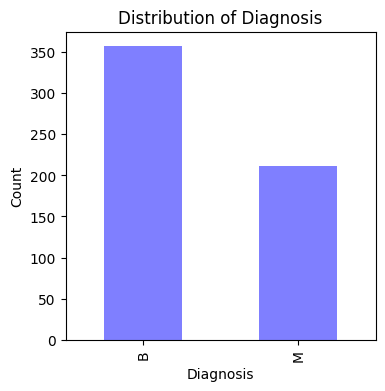

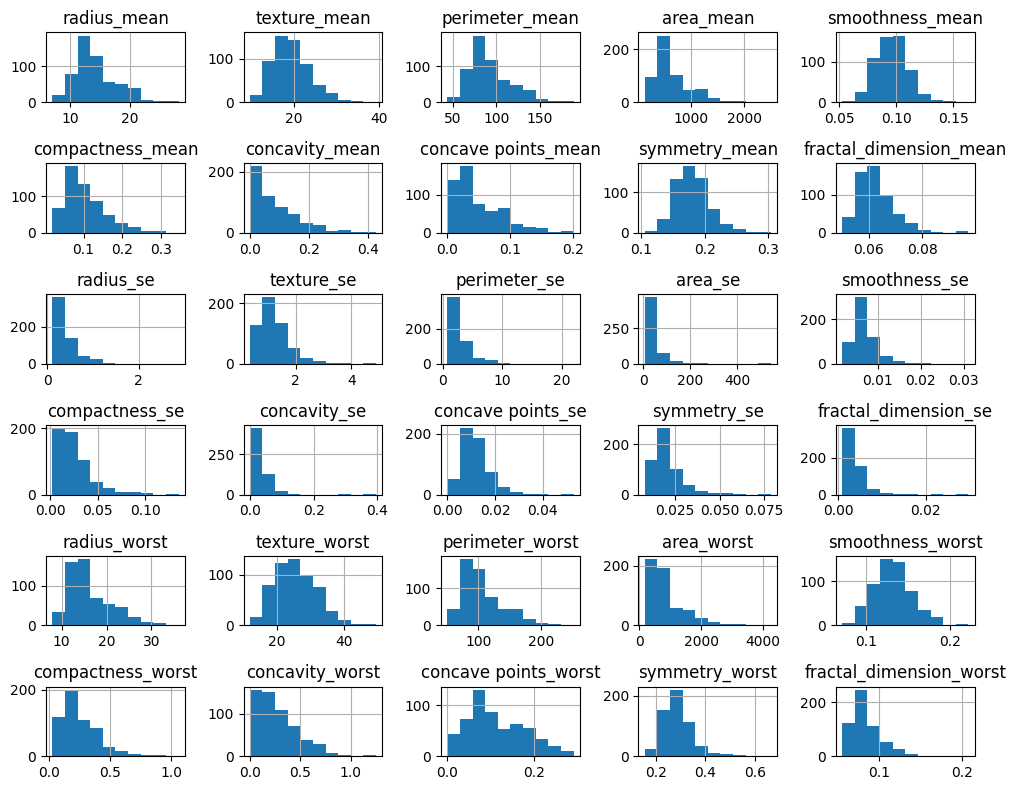

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load the data

data = pd.read_csv("data.csv")

# Convert diagnosis column to categorical
data['diagnosis'] = pd.Categorical(data['diagnosis'])

# Drop the 33rd column
data.drop(data.columns[32], axis=1, inplace=True)

# General data info
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check proportion of data

print("\n")
print(data['diagnosis'].value_counts(normalize=True))
print("\n")



# Set the figure size
plt.figure(figsize=(4, 4))

# Plot the distribution of the Diagnosis column
data['diagnosis'].value_counts().plot(kind='bar', color='blue', alpha=0.5)

# Customize the plot
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Show plot
plt.show()




# Selecting numerical columns and removing 'id' column
numerical_data = data.drop(columns=['id'])
# Plotting histograms for each numerical variable
numerical_data.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()









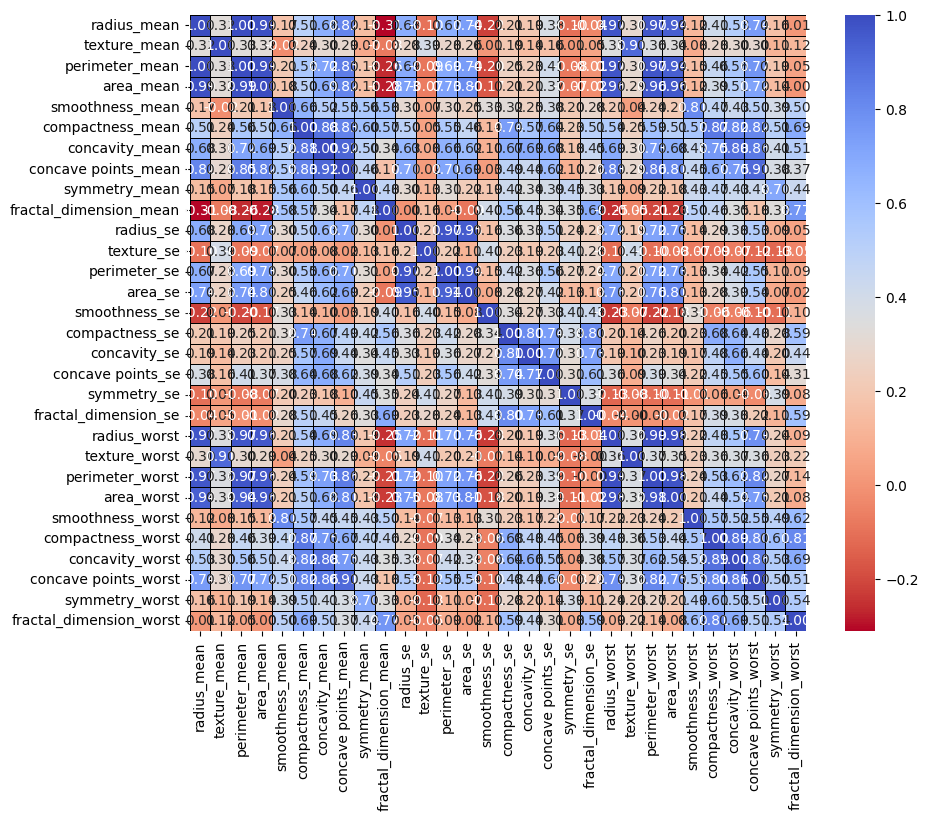

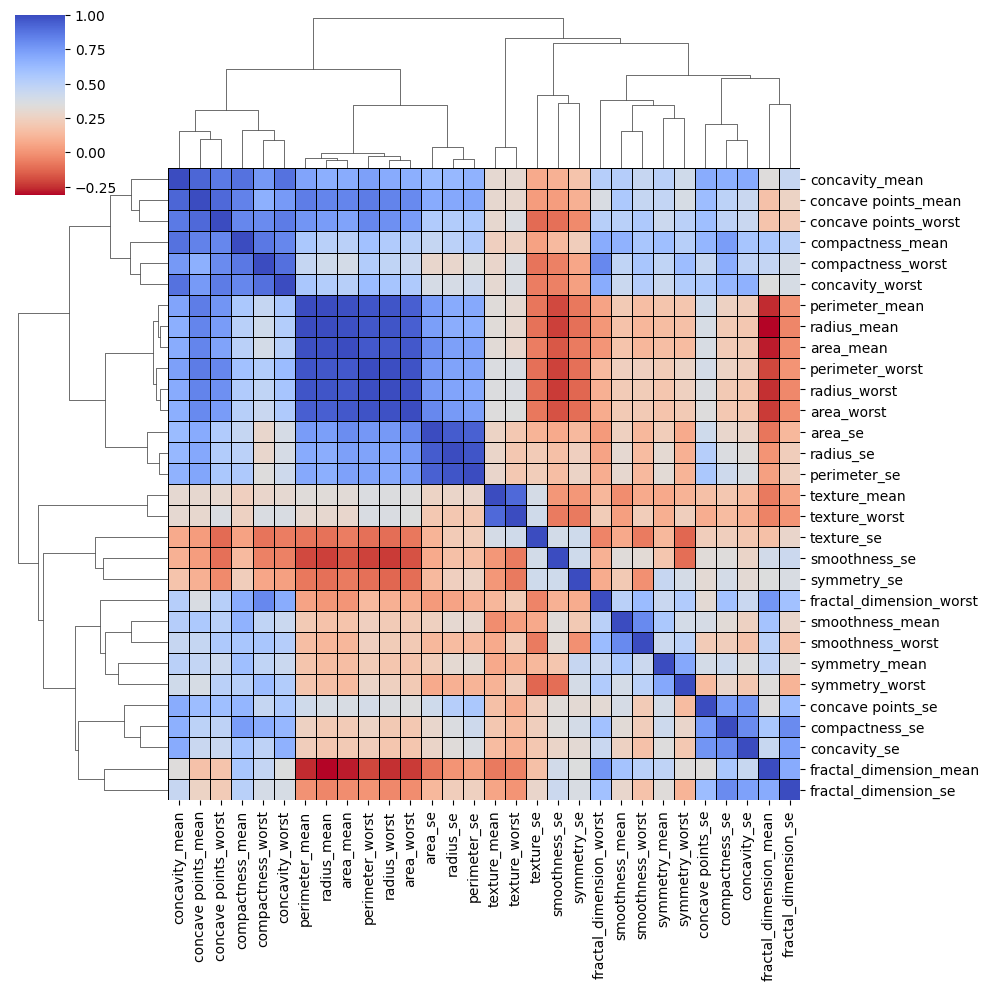

In [10]:

# Calculate correlation matrix
correlation_matrix = data.iloc[:, 2:].corr()

# Create the correlation plot with reversed color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt=".2f", linewidths=0.5, linecolor='black', square=True)

# Add hierarchical clustering
dendrogram = sns.clustermap(correlation_matrix, cmap='coolwarm_r', linewidths=0.5, linecolor='black', square=True)

# Rotate the dendrogram
plt.setp(dendrogram.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()


In [11]:
import numpy as np

# Calculate correlation matrix
correlation_matrix = np.corrcoef(data.iloc[:, 2:], rowvar=False)

# Set the cutoff value
cutoff = 0.9

# Find highly correlated attributes
def find_correlation(matrix, cutoff):
    correlated_attrs = set()
    for i in range(matrix.shape[0]):
        for j in range(i+1, matrix.shape[1]):
            if abs(matrix[i, j]) >= cutoff:
                correlated_attrs.add(i)
                correlated_attrs.add(j)
    return list(correlated_attrs)

highly_correlated = find_correlation(correlation_matrix, cutoff)
print(highly_correlated)


[0, 1, 2, 3, 6, 7, 10, 12, 13, 20, 21, 22, 23, 27]


In [12]:
# Remove correlated variables
data2 = data.drop(data.columns[highly_correlated], axis=1)

# Number of columns after removing correlated variables
num_columns_data2 = data2.shape[1]
print("Number of columns after removing correlated variables:", num_columns_data2)


Number of columns after removing correlated variables: 18


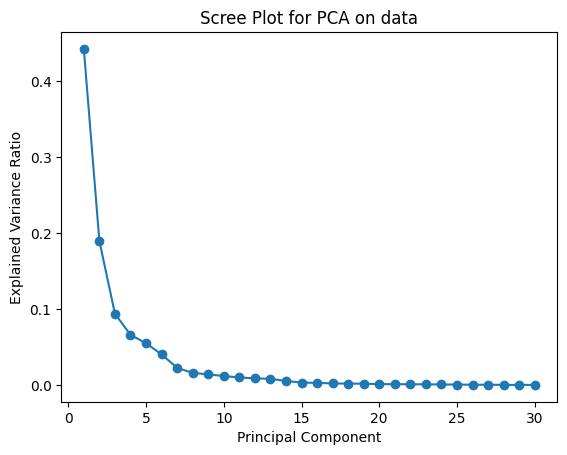

Summary of PCA on data:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0             3.647601                0.442720               0.442720
1             2.387755                0.189712               0.632432
2             1.680152                0.093932               0.726364
3             1.408591                0.066021               0.792385
4             1.285159                0.054958               0.847343
5             1.099765                0.040245               0.887588
6             0.822441                0.022507               0.910095
7             0.690982                0.015887               0.925983
8             0.646242                0.013896               0.939879
9             0.592715                0.011690               0.951569
10            0.542617                0.009797               0.961366
11            0.511489                0.008705               0.970071
12            0.491714                0.008045               0.978

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Exclude the first two columns
data_for_pca = data.iloc[:, 2:]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca = PCA()
pca_res_data = pca.fit_transform(data_scaled)
# Plot PCA results
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA on data')
plt.show()

# Summary of PCA results
print("Summary of PCA on data:")
print(pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                    'Proportion of Variance': pca.explained_variance_ratio_,
                    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)}))

# Analysis of variance explained by components
variance_explained = np.cumsum(pca.explained_variance_ratio_)
print("\nVariance explained by components:")
for i, explained_variance in enumerate(variance_explained):
    print(f"Component {i+1}: {explained_variance:.4f}")


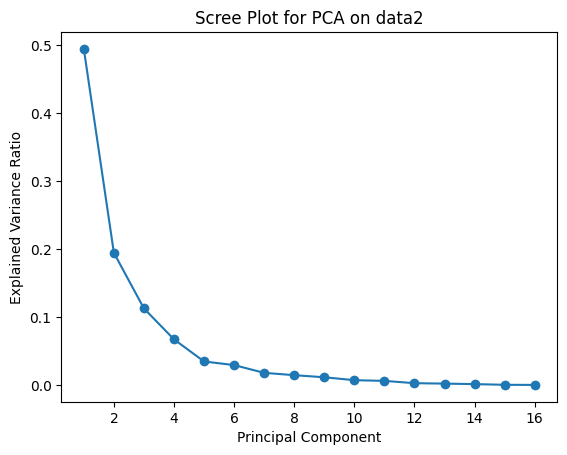

Summary of PCA on data2:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0             2.815374                0.494525               0.494525
1             1.766344                0.194656               0.689181
2             1.344809                0.112833               0.802014
3             1.039253                0.067384               0.869398
4             0.747624                0.034872               0.904271
5             0.688631                0.029586               0.933857
6             0.539321                0.018147               0.952004
7             0.486102                0.014742               0.966747
8             0.432303                0.011660               0.978406
9             0.343815                0.007375               0.985781
10            0.318434                0.006326               0.992108
11            0.218536                0.002980               0.995087
12            0.193087                0.002326               0.99

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data2' is a pandas DataFrame

# Exclude the first two columns
data2_for_pca = data2.iloc[:, 2:]

# Standardize the data
scaler2 = StandardScaler()
data2_scaled = scaler2.fit_transform(data2_for_pca)

# Perform PCA on data2
pca2 = PCA()
pca_res_data2 = pca2.fit_transform(data2_scaled)

# Plot PCA results for data2
plt.plot(np.arange(1, pca2.n_components_ + 1), pca2.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA on data2')
plt.show()

# Summary of PCA results for data2
print("Summary of PCA on data2:")
print(pd.DataFrame({'Standard deviation': np.sqrt(pca2.explained_variance_),
                    'Proportion of Variance': pca2.explained_variance_ratio_,
                    'Cumulative Proportion': np.cumsum(pca2.explained_variance_ratio_)}))

# Analysis of variance explained by components for data2
variance_explained_data2 = np.cumsum(pca2.explained_variance_ratio_)
print("\nVariance explained by components for data2:")
for i, explained_variance in enumerate(variance_explained_data2):
    print(f"Component {i+1}: {explained_variance:.4f}")


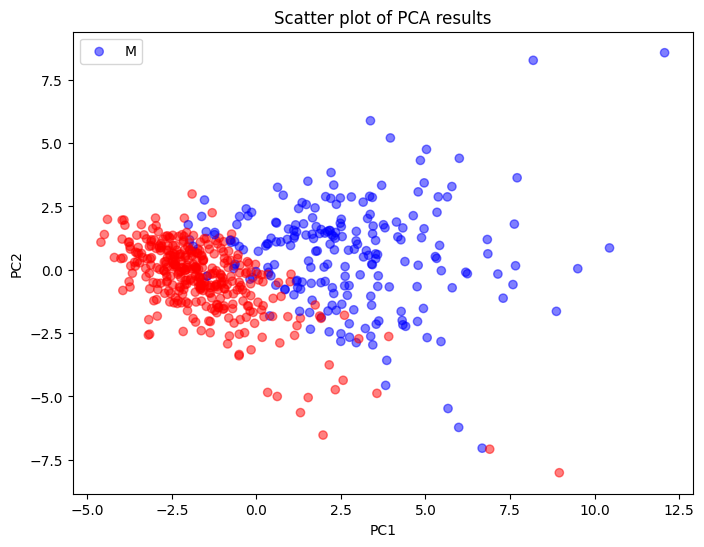

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert PCA results to a DataFrame including only the first two principal components
pca_df = pd.DataFrame(pca_res_data2[:, :2], columns=['PC1', 'PC2'])

# Add 'diagnosis' column to the DataFrame
pca_df['diagnosis'] = data['diagnosis'].values

# Plot scatter plot
plt.figure(figsize=(8, 6))
colors = {'M': 'blue', 'B': 'red'}  # Assuming 'M' is malignant and 'B' is benign
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['diagnosis'].map(colors), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PCA results')
plt.legend(labels=colors.keys())
plt.show()


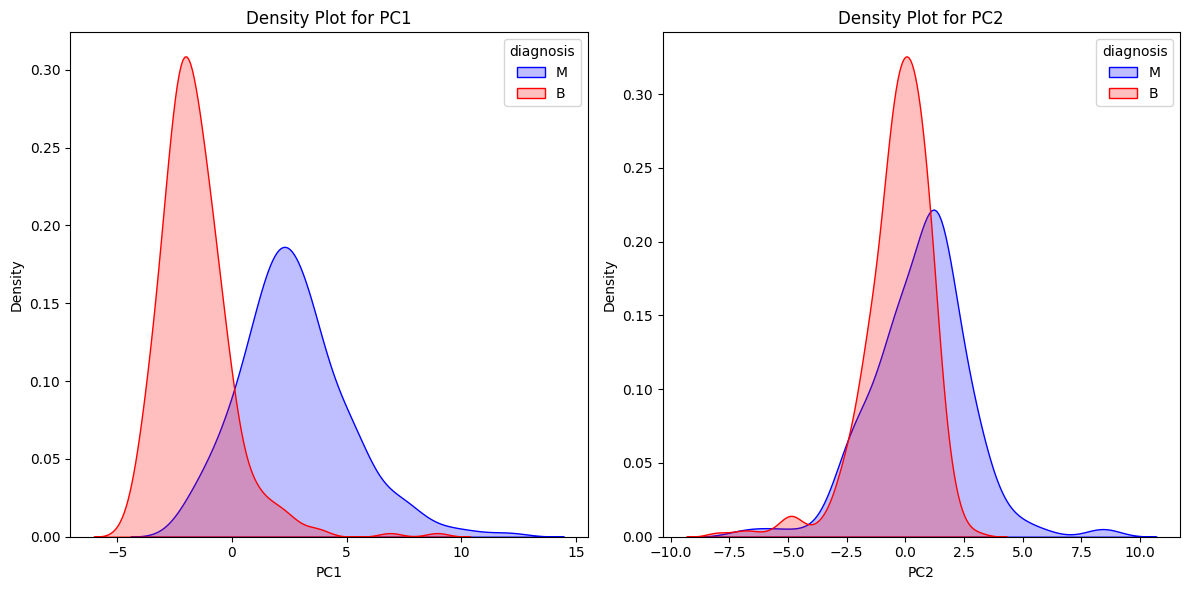

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each class
colors = {'M': 'blue', 'B': 'red'}  # Assuming 'M' is malignant and 'B' is benign

# Create subplots for PC1 and PC2 densities side by side
plt.figure(figsize=(12, 6))

# Density plot for PC1
plt.subplot(1, 2, 1)
for label, color in colors.items():
    subset = pca_df[pca_df['diagnosis'] == label]
    sns.kdeplot(subset['PC1'], color=color, fill=True, alpha=0.25, label=label)
plt.title('Density Plot for PC1')
plt.xlabel('PC1')
plt.legend(title='diagnosis')

# Density plot for PC2
plt.subplot(1, 2, 2)
for label, color in colors.items():
    subset = pca_df[pca_df['diagnosis'] == label]
    sns.kdeplot(subset['PC2'], color=color, fill=True, alpha=0.25, label=label)
plt.title('Density Plot for PC2')
plt.xlabel('PC2')
plt.legend(title='diagnosis')

plt.tight_layout()
plt.show()


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(1815)

# Combine the 'diagnosis' column with 'data2'
data3 = pd.concat([data['diagnosis'], data2], axis=1)

# Split the dataset into features (X) and target variable (y)
X = data3.drop(columns=['diagnosis'])
y = data3['diagnosis']

# Split the dataset into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Create cross-validation object
fitControl = StratifiedKFold(n_splits=15, shuffle=True, random_state=1815)


**1. Naive Bayes Model**




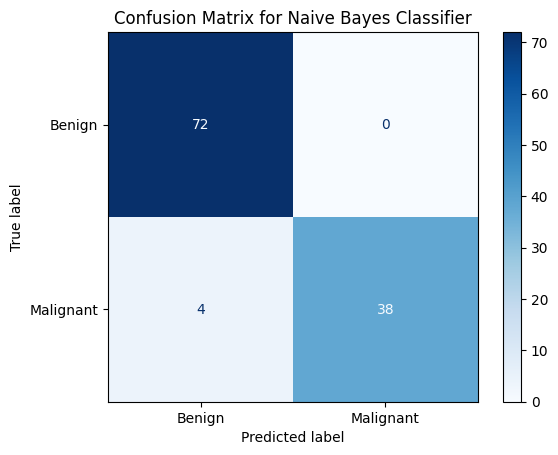


Accuracy: 0.9649122807017544
95% CI: (0.9311349650339525, 0.9986895963695562)
Sensitivity: 0.9047619047619048
Specificity: 1.0
'Positive' Class: Malignant
Balanced Accuracy: 0.9523809523809523
Positive Predictive Value: 1.0
Negative Predictive Value: 0.9473684210526315




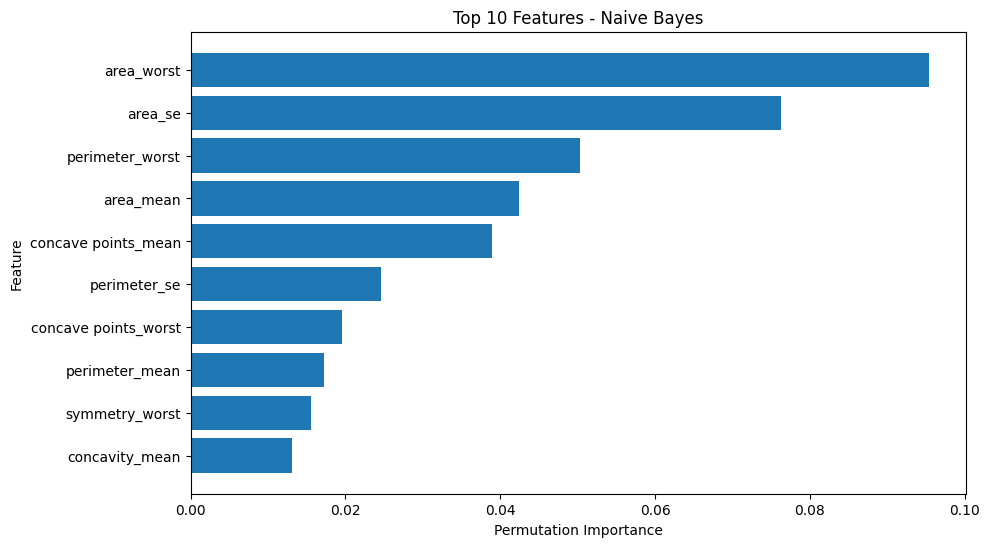

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import norm
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder



# Assuming 'train_data' and 'test_data' are pandas DataFrames with the target variable 'diagnosis'
# Extract features and target variables



# Create a pipeline with preprocessing (centering and scaling) and Naive Bayes classifier
model_naiveb = make_pipeline(StandardScaler(), GaussianNB())

# Train the model
model_naiveb.fit(X_train, y_train)

# Make predictions
predictions_naiveb = model_naiveb.predict(X_test)

# Generate confusion matrix
conf_matrix_naiveb = confusion_matrix(y_test, predictions_naiveb, labels=["B", "M"])

# Display confusion matrix
display = ConfusionMatrixDisplay(conf_matrix_naiveb, display_labels=["Benign", "Malignant"])
display.plot(cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Compute additional metrics
tn, fp, fn, tp = conf_matrix_naiveb.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)

n = tp + tn + fp + fn
z = 1.96  # Z-value for 95% confidence level
ci_lower = accuracy - z * np.sqrt((accuracy * (1 - accuracy)) / n)
ci_upper = accuracy + z * np.sqrt((accuracy * (1 - accuracy)) / n)


# Convert categorical target variable to numerical representation
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Now you can calculate mean and other statistics
nir = max(y_test_encoded.mean(), 1 - y_test_encoded.mean())
p_value = 2 * (1 - norm.cdf(abs(accuracy - nir) / np.sqrt((accuracy * (1 - accuracy)) / n)))

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

positive_class = 'Malignant'

balanced_accuracy = (sensitivity + specificity) / 2

pos_pred_value = tp / (tp + fp)

neg_pred_value = tn / (tn + fn)

# Print computed metrics
print("\nAccuracy:", accuracy)
print("95% CI:", (ci_lower, ci_upper))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("'Positive' Class:", positive_class)
print("Balanced Accuracy:", balanced_accuracy)
print("Positive Predictive Value:", pos_pred_value)
print("Negative Predictive Value:", neg_pred_value)
print("\n")

# Compute permutation importances
perm_importance = permutation_importance(model_naiveb, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X_test.columns

# Get sorted indices of features by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot top 10 features
top_features_idx = sorted_idx[-10:]
top_features = feature_names[top_features_idx]
top_importance = perm_importance.importances_mean[top_features_idx]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importance)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features - Naive Bayes')
plt.show()

**2. Logistic Regression Model**


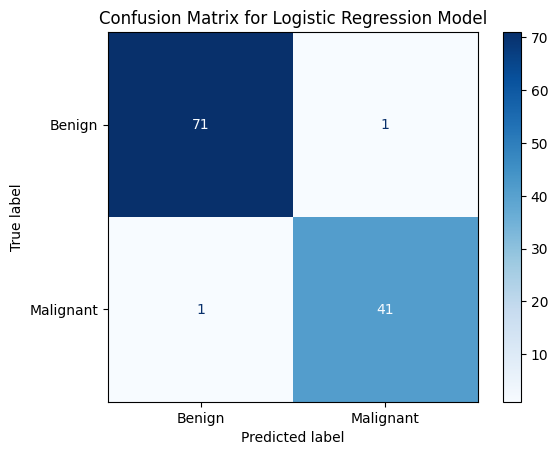

Confusion Matrix and Statistics:
Reference	Prediction	B	M
B		B		71	1
M		M		1	41

Accuracy: 0.9824561403508771

Sensitivity: 0.9761904761904762
Specificity: 0.9861111111111112

Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        72
   Malignant       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



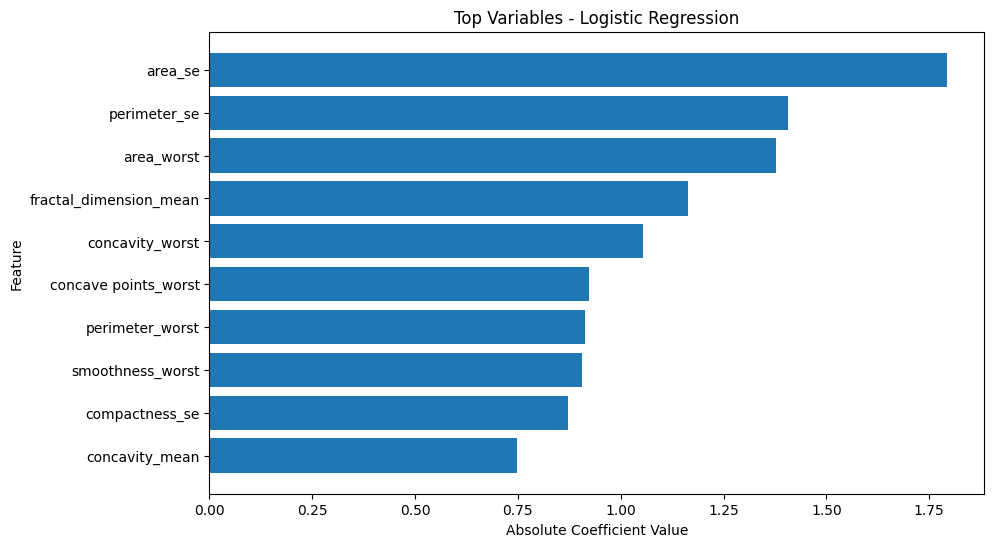

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
# Create a pipeline with preprocessing (centering and scaling) and Logistic Regression classifier
model_logreg = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
model_logreg.fit(X_train, y_train)

# Make predictions
predictions_logreg = model_logreg.predict(X_test)

# Generate confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, predictions_logreg, labels=["B", "M"])

# Display confusion matrix
display = ConfusionMatrixDisplay(conf_matrix_logreg, display_labels=["Benign", "Malignant"])
display.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Check results
confusionmatrix_logreg = confusion_matrix(y_test, predictions_logreg, labels=["B", "M"])
print("Confusion Matrix and Statistics:")
print("Reference\tPrediction\tB\tM")
for i in range(len(confusionmatrix_logreg)):
    print(f"{['B', 'M'][i]}\t\t{['B', 'M'][i]}\t\t{confusionmatrix_logreg[i][0]}\t{confusionmatrix_logreg[i][1]}")



# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_logreg)
print("\nAccuracy:", accuracy)



TN, FP, FN, TP = conf_matrix_logreg.ravel()

# Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Print Sensitivity and Specificity
print(f"\nSensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


# Generate classification report to get other metrics
class_report = classification_report(y_test, predictions_logreg, target_names=["Benign", "Malignant"])
print("\nClassification Report:")
print(class_report)


# ==================== top features =====================

# Get the coefficients of the logistic regression model
coefficients = model_logreg.named_steps['logisticregression'].coef_[0]

# Get the absolute values of coefficients
absolute_coefficients = np.abs(coefficients)

# Get the indices of top 10 features
top_indices = np.argsort(absolute_coefficients)[-10:]

# Get the corresponding feature names
top_features = X.columns[top_indices]

# Get the corresponding absolute coefficients
top_absolute_coefficients = absolute_coefficients[top_indices]

# Plot the top variables
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_absolute_coefficients[::-1])
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top Variables - Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


# *3. Random Forest Model **

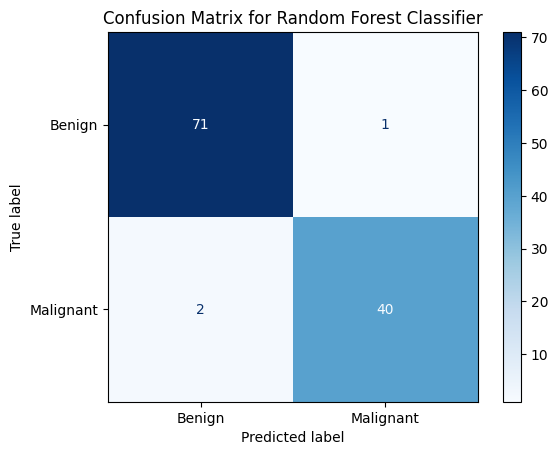

Confusion Matrix and Statistics:
[[71  2]
 [ 1 40]]

Accuracy: 0.9736842105263158

Sensitivity: 0.9523809523809523
Specificity: 0.9861111111111112

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



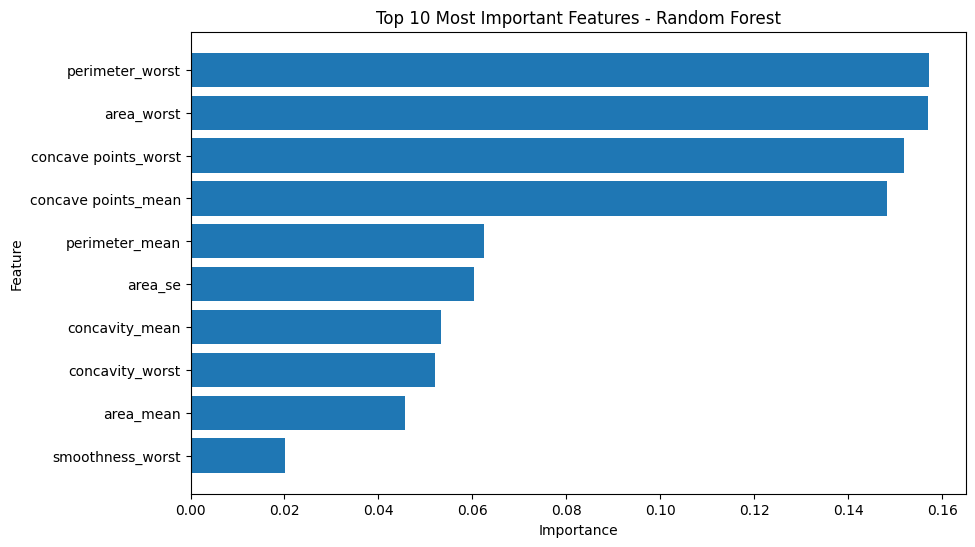

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a pipeline with preprocessing (centering and scaling) and Random Forest classifier
model_randomforest = make_pipeline(StandardScaler(), RandomForestClassifier())

# Train the model
model_randomforest.fit(X_train, y_train)

# Make predictions
predictions_randomforest = model_randomforest.predict(X_test)

# Generate confusion matrix
conf_matrix_randomforest = confusion_matrix(y_test, predictions_randomforest, labels=["B", "M"])

# Display confusion matrix
display = ConfusionMatrixDisplay(conf_matrix_randomforest, display_labels=["Benign", "Malignant"])
display.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Evaluate performance
confusionmatrix_randomforest = confusion_matrix(predictions_randomforest, y_test, labels=["B", "M"])
print("Confusion Matrix and Statistics:")
print(confusionmatrix_randomforest)



# Calculate accuracy
accuracy_randomforest = accuracy_score(y_test, predictions_randomforest)
print("\nAccuracy:", accuracy_randomforest)

TN, FP, FN, TP = conf_matrix_randomforest.ravel()

# Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Print Sensitivity and Specificity
print(f"\nSensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

# Generate classification report to get other metrics
class_report_randomforest = classification_report(y_test, predictions_randomforest, target_names=["Benign", "Malignant"])
print("\nClassification Report:")
print(class_report_randomforest)




import matplotlib.pyplot as plt

# Assuming 'model_randomforest' is a trained Pipeline object containing a RandomForestClassifier

# Get the RandomForestClassifier object from the pipeline
random_forest = model_randomforest.named_steps['randomforestclassifier']

# Extract feature importances from the trained random forest model
feature_importances = random_forest.feature_importances_

# Get indices of top 10 most important features
top_indices = feature_importances.argsort()[-10:]

# Get names of top 10 most important features
top_features = X_train.columns[top_indices]

# Get corresponding importances
top_importances = feature_importances[top_indices]

# Plot top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_indices)), top_importances, align='center')
plt.yticks(range(len(top_indices)), top_features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features - Random Forest')
plt.show()


# *4. K Nearest Neighbor (KNN) Model **

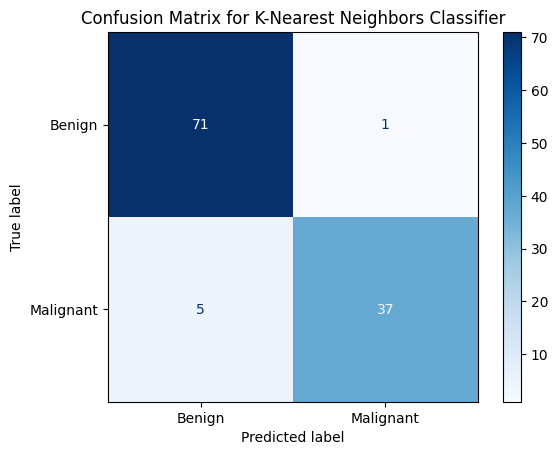


Accuracy: 0.9473684210526315

Sensitivity: 0.8809523809523809
Specificity: 0.9861111111111112


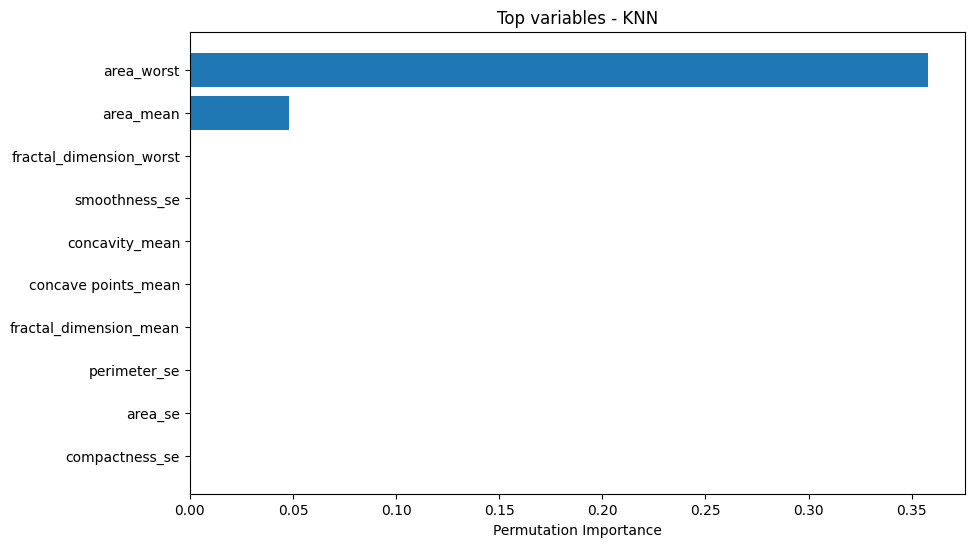

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set up the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid to search over
param_grid = {'n_neighbors': range(1, 21)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid=param_grid, cv=fitControl, scoring='roc_auc')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Make predictions
predictions_knn = best_knn_model.predict(X_test)

# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, predictions_knn, labels=["B", "M"])

# Display confusion matrix
display = ConfusionMatrixDisplay(conf_matrix_knn, display_labels=["Benign", "Malignant"])
display.plot(cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.show()




# Calculate accuracy
accuracy_knn = accuracy_score(y_test, predictions_knn)
print("\nAccuracy:", accuracy_knn)

TN, FP, FN, TP = conf_matrix_knn.ravel()

# Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Print Sensitivity and Specificity
print(f"\nSensitivity: {sensitivity}")
print(f"Specificity: {specificity}")



# Compute permutation importances
result = permutation_importance(best_knn_model, X_test, y_test, n_repeats=10, random_state=1815)

# Get sorted indices of feature importances
sorted_idx = result.importances_mean.argsort()

# Plot feature importance for the top 10 variables
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), result.importances_mean[sorted_idx][-top_n:], align='center')
plt.yticks(range(top_n), X_test.columns[sorted_idx][-top_n:])
plt.xlabel('Permutation Importance')
plt.title('Top variables - KNN')
plt.show()

# *5. Neural Network with PCA Model **

Fitting 15 folds for each of 27 candidates, totalling 405 fits


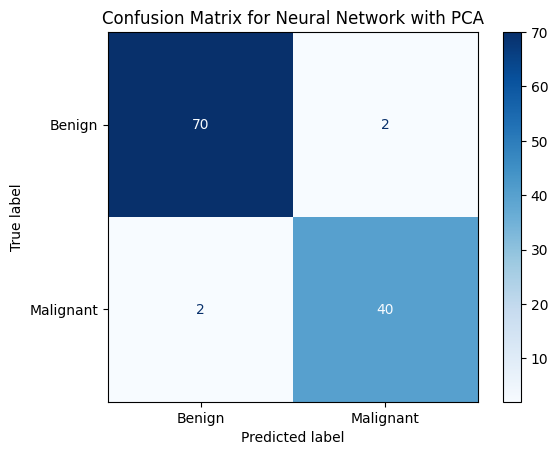

Confusion Matrix:
[[70  2]
 [ 2 40]]

Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        72
   Malignant       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# Define the pipeline with preprocessing and neural network classifier
model_nnet_pca = make_pipeline(StandardScaler(), PCA(), MLPClassifier())

# Define parameter grid for hyperparameter tuning
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(100,), (50,), (25,)],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__solver': ['adam'],
    'mlpclassifier__max_iter': [200, 300, 400]
}

t1 = time.time()
fitControl = StratifiedKFold(n_splits=15, shuffle=True, random_state=1815)
# Perform grid search with cross-validation
grid_search = GridSearchCV(model_nnet_pca, param_grid=param_grid, cv=fitControl, scoring='roc_auc', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_nnet_model = grid_search.best_estimator_

# Make predictions
predictions_nnet_pca = best_nnet_model.predict(X_test)



# Calculate confusion matrix
conf_matrix_nnet_pca = confusion_matrix(y_test, predictions_nnet_pca)



# Display confusion matrix
display = ConfusionMatrixDisplay(conf_matrix_nnet_pca, display_labels=["Benign", "Malignant"])
display.plot(cmap='Blues')
plt.title('Confusion Matrix for Neural Network with PCA')
plt.show()

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix_nnet_pca)
# Calculate accuracy
accuracy_nnet_pca = accuracy_score(y_test, predictions_nnet_pca)
print("\nAccuracy:", accuracy_nnet_pca)

# Generate classification report to get other metrics
class_report_nnet_pca = classification_report(y_test, predictions_nnet_pca, target_names=["Benign", "Malignant"])
print("\nClassification Report:")
print(class_report_nnet_pca)


t2 = time.time()



In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the models
models_list = [
    ("Naive Bayes", model_naiveb),
    ("Logistic Regression", model_logreg),
    ("Random Forest", model_randomforest),
    ("KNN", best_knn_model),
    ("Neural Network with PCA", best_nnet_model)
]

# Evaluate each model and calculate metrics
for name, model in models_list:
    # Make predictions
    predictions = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    # Print model name and metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")


Model: Naive Bayes
Accuracy: 0.9649122807017544
Precision: 0.966759002770083
Recall: 0.9649122807017544
F1 Score: 0.9645092460881936


Model: Logistic Regression
Accuracy: 0.9824561403508771
Precision: 0.9824561403508771
Recall: 0.9824561403508771
F1 Score: 0.9824561403508771


Model: Random Forest
Accuracy: 0.9736842105263158
Precision: 0.9737105878629081
Recall: 0.9736842105263158
F1 Score: 0.9736164257756981


Model: KNN
Accuracy: 0.9473684210526315
Precision: 0.9487534626038782
Recall: 0.9473684210526315
F1 Score: 0.9467638691322903


Model: Neural Network with PCA
Accuracy: 0.9649122807017544
Precision: 0.9649122807017544
Recall: 0.9649122807017544
F1 Score: 0.9649122807017544




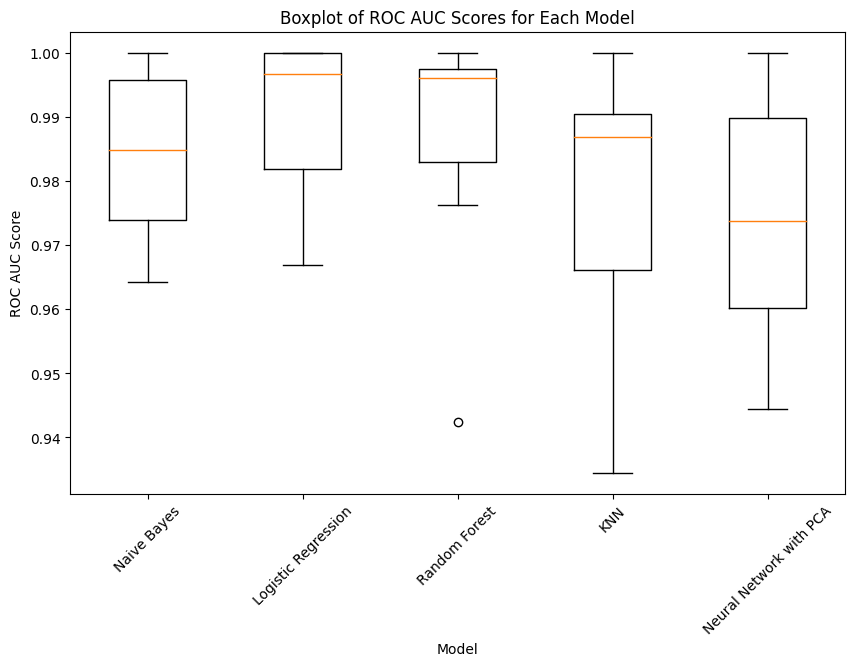

In [40]:
# Define a dictionary to store the models
models_dict = {
    'Naive Bayes': model_naiveb,
    'Logistic Regression': model_logreg,
    'Random Forest': model_randomforest,
    'KNN': best_knn_model,
    'Neural Network with PCA': model_nnet_pca
}

# Define a dictionary to store the ROC AUC scores for each model
roc_scores = {}

# Evaluate each model and calculate ROC AUC scores
for name, model in models_dict.items():
    # Use cross_val_score to get ROC AUC scores
    roc_auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

    # Store the ROC AUC scores
    roc_scores[name] = roc_auc_scores

# Plot boxplot of ROC AUC scores
plt.figure(figsize=(10, 6))
plt.boxplot(roc_scores.values())
plt.xticks(range(1, len(roc_scores) + 1), roc_scores.keys(), rotation=45)
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.title('Boxplot of ROC AUC Scores for Each Model')
plt.show()
